**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 6**
Ingeniería de características (FE)

---

*   NOMBRE: Francisco Marmolejo Martinez
*   MATRÍCULA: A01794882
*   NOMBRE: Carlos Eduardo García García
*   MATRÍCULA: A01795206
*   NOMBRE: Hugo Jovan Ramirez Ceron
*   MATRÍCULA: A00994966
*   Manuel Enrique Rodríguez Rey
*   MATRÍCULA: A01795206



In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/TC4029 - Ciencia y analítica de datos/Actividad6"
os.chdir(DIR)

In [32]:
pip install -U scikit-learn

In [75]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 1.1 MB/s eta 0:00:00


In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import datetime
import statsmodels.api as sm
from sklearn.preprocessing import PowerTransformer, KBinsDiscretizer, MinMaxScaler
from sklearn import preprocessing


In [34]:
cars_df = pd.read_csv('vehicles.csv')
cars_df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


In [35]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [36]:
column_count = len(cars_df.columns)
column_count

26

# **Parte 1**. Preprocesamiento

1a)    Elimina las columnas que no serán relevantes para esta actividad: `id`, `VIN`, `url`, `image_url`, `description`, `posting_date`.


In [37]:
cars_df = cars_df.drop(columns=['id', 'VIN', 'url', 'image_url', 'description', 'posting_date'])

In [38]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        426880 non-null  object 
 1   region_url    426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  drive         296313 non-null  object 
 13  size          120519 non-null  object 
 14  type          334022 non-null  object 
 15  paint_color   296677 non-null  object 
 16  county        0 non-null       float64
 17  state         426880 non-null  object 
 18  lat 

1b) Almacena en una variable la cantidad de observaciones o registros del dataframe y en otra el número de columnas (después del borrado) para análisis posteriores.

In [39]:
rows_count_isnan = len(cars_df.index)
rows_count_isnan

426880

In [40]:
column_count = len(cars_df.columns)
column_count

20

## Valores faltantes

Cuando la cantidad de valores faltantes en una columna es lo suficientemente grande (aproximadamente más del 25%), estimar e ingresar los valores faltantes no tiene sentido, y eliminar el atributo es mejor que estimar los valores faltantes. https://learning.oreilly.com/library/view/hands-on-data-preprocessing/9781801072137/B17397_11_Final_NM_ePub.xhtml#_idParaDest-188

Sin embargo, esto no es una regla aplicable a todos los escenarios y hay muchas discusiones en torno a ello. https://discuss.analyticsvidhya.com/t/what-should-be-the-allowed-percentage-of-missing-values/2456/10

Para esta actividad  utilizaremos un umbral de 0.70 de la cantidad de registros (aquellas columnas que tengan 70% de valores no nulos). Considera además que estamos asumiendo que dichas variables son MCAR o MAR sin ninguna método gráfico o estadístico.

2a) Determina el porcentaje de valores faltantes por columna y elimina aquellas que posean el 30% o más de valores perdidos. Para ello utiliza el parámetro `thresh` de la función `dropna()` ¿Cuántas columnas se eliminaron?


In [41]:
threshold = 30  # 30% threshold
columns_to_drop = []

for column in cars_df.columns:
    missing_percentage = (cars_df[column].isnull().mean()) * 100
    print(f"Columna '{column}' tiene {missing_percentage:.2f}% de valores perdidos.")

    if missing_percentage >= threshold:
        columns_to_drop.append(column)

cars_df = cars_df.drop(columns=columns_to_drop)

print(f"Columnas a eliminar '{columns_to_drop}'")
print(f"Se eliminaron '{len(columns_to_drop)}' columnas")
cars_df.info()

Columna 'region' tiene 0.00% de valores perdidos.
Columna 'region_url' tiene 0.00% de valores perdidos.
Columna 'price' tiene 0.00% de valores perdidos.
Columna 'year' tiene 0.28% de valores perdidos.
Columna 'manufacturer' tiene 4.13% de valores perdidos.
Columna 'model' tiene 1.24% de valores perdidos.
Columna 'condition' tiene 40.79% de valores perdidos.
Columna 'cylinders' tiene 41.62% de valores perdidos.
Columna 'fuel' tiene 0.71% de valores perdidos.
Columna 'odometer' tiene 1.03% de valores perdidos.
Columna 'title_status' tiene 1.93% de valores perdidos.
Columna 'transmission' tiene 0.60% de valores perdidos.
Columna 'drive' tiene 30.59% de valores perdidos.
Columna 'size' tiene 71.77% de valores perdidos.
Columna 'type' tiene 21.75% de valores perdidos.
Columna 'paint_color' tiene 30.50% de valores perdidos.
Columna 'county' tiene 100.00% de valores perdidos.
Columna 'state' tiene 0.00% de valores perdidos.
Columna 'lat' tiene 1.53% de valores perdidos.
Columna 'long' tiene 1

Además, cuando tenemos grandes conjuntos de datos, podemos eliminar filas que contienen valores nulos. Aunque, no se recomienda si el porcentaje de valores faltantes en el conjunto de datos es superior al 30%
https://medium.com/analytics-vidhya/how-to-deal-with-missing-values-in-data-set-8e8f70ecf155

2b) Borra los registros que contengan `NaN` en las columnas con menos del 5% de valores faltantes empleando el parámetro subset ¿Qué porcentaje de los registros iniciales se eliminaron?


**10.16%** de los valores se eliminaron

In [42]:
for i, col in enumerate(cars_df.columns):
    percent_null = cars_df[col].isna().sum()* 100/len(cars_df[col]) < 5
    print(col,':', percent_null)
    if(percent_null):
      cars_df = cars_df.dropna(subset=[col])
rows_count = len(cars_df.index)
rows_count

region : True
region_url : True
price : True
year : True
manufacturer : True
model : True
fuel : True
odometer : True
title_status : True
transmission : True
type : False
state : True
lat : True
long : True


383489

In [43]:
rows_count_isnan-rows_count

43391

In [44]:
(rows_count_isnan-rows_count)*100/rows_count_isnan

10.16468328335832

2c) Si hay variables que aún poseen valores faltantes, utiliza el método de imputación apropiado (`mean, median, mode`)

In [45]:
cars_df.isna().sum()

region              0
region_url          0
price               0
year                0
manufacturer        0
model               0
fuel                0
odometer            0
title_status        0
transmission        0
type            82395
state               0
lat                 0
long                0
dtype: int64

In [46]:
mode_value = cars_df['type'].mode()
mode_value

0    sedan
Name: type, dtype: object

In [47]:
cars_df["type"] = cars_df["type"].fillna("sedan")

In [48]:
cars_df["type"].isnull().sum()

0

In [49]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383489 entries, 27 to 426879
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        383489 non-null  object 
 1   region_url    383489 non-null  object 
 2   price         383489 non-null  int64  
 3   year          383489 non-null  float64
 4   manufacturer  383489 non-null  object 
 5   model         383489 non-null  object 
 6   fuel          383489 non-null  object 
 7   odometer      383489 non-null  float64
 8   title_status  383489 non-null  object 
 9   transmission  383489 non-null  object 
 10  type          383489 non-null  object 
 11  state         383489 non-null  object 
 12  lat           383489 non-null  float64
 13  long          383489 non-null  float64
dtypes: float64(4), int64(1), object(9)
memory usage: 43.9+ MB


## Valores atípicos

3a) Obtén el histograma de las variables `price`, `year` y `odometer` para observar su distribución.

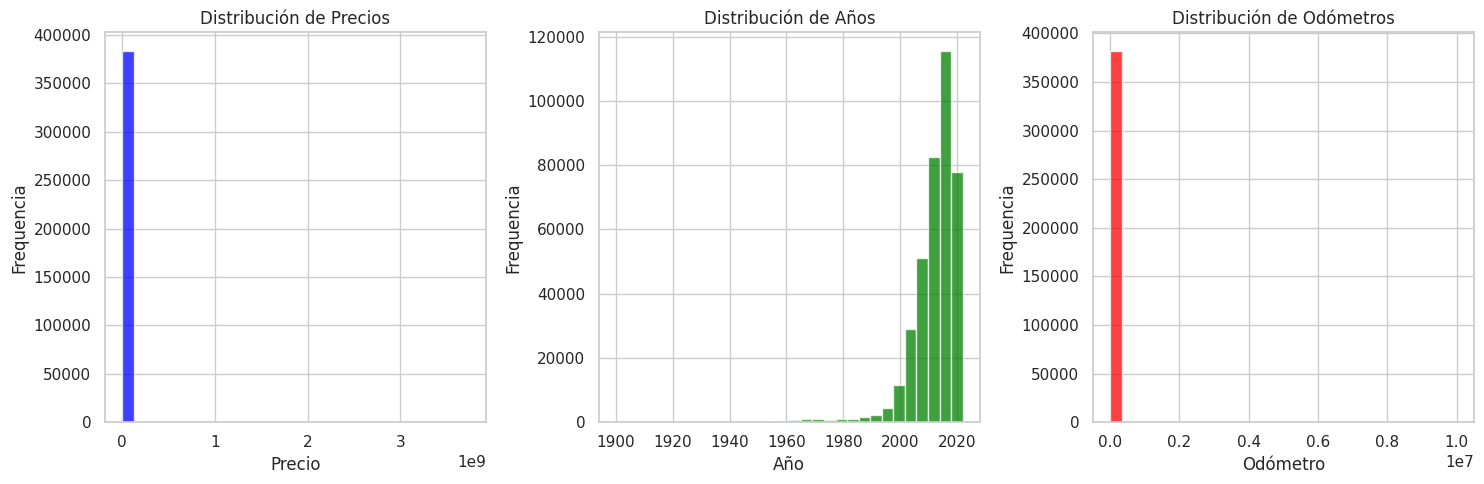

In [50]:
# Crear un subplot de 1x3 porque son 3 columnas
plt.figure(figsize=(15, 5))
plt.subplot(131)
# Primer subplot para 'price'
plt.hist(cars_df['price'], bins=30, color='blue', alpha=0.75)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frequencia')
plt.subplot(132)
# Segundo subplot para 'year'
plt.hist(cars_df['year'], bins=30, color='green', alpha=0.75)
plt.title('Distribución de Años')
plt.xlabel('Año')
plt.ylabel('Frequencia')
plt.subplot(133)
# Tercer subplot para 'odometer'
plt.hist(cars_df['odometer'], bins=30, color='red', alpha=0.75)
plt.title('Distribución de Odómetros')
plt.xlabel('Odómetro')
plt.ylabel('Frequencia')
# Mostrar los histogramas
plt.tight_layout()
plt.show()

3b) Añade la columna `age`, calculada a partir de `year`, para determinar los años del vehículo y una vez obtenida, elimina la columna `year`. Genera el histograma de la nueva variable.

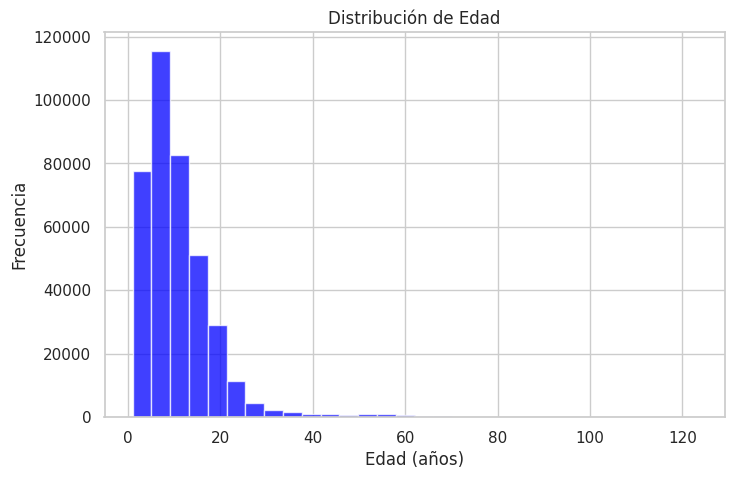

In [51]:
import datetime

# Cálculo de la edad
cars_df['age'] = datetime.date.today().year - cars_df['year']

# Eliminar la columna 'year'
cars_df.drop(columns=['year'], inplace=True)

# Crear un histograma de la columna 'age'
plt.figure(figsize=(8, 5))
plt.hist(cars_df['age'], bins=30, color='blue', alpha=0.75)
plt.title('Distribución de Edad')
plt.xlabel('Edad (años)')
plt.ylabel('Frecuencia')

# Mostrar el histograma
plt.show()

4a) Para visualizar si hay valores atípicos, genera gráficos de box plot para las tres variables (`price, age, odometer`)

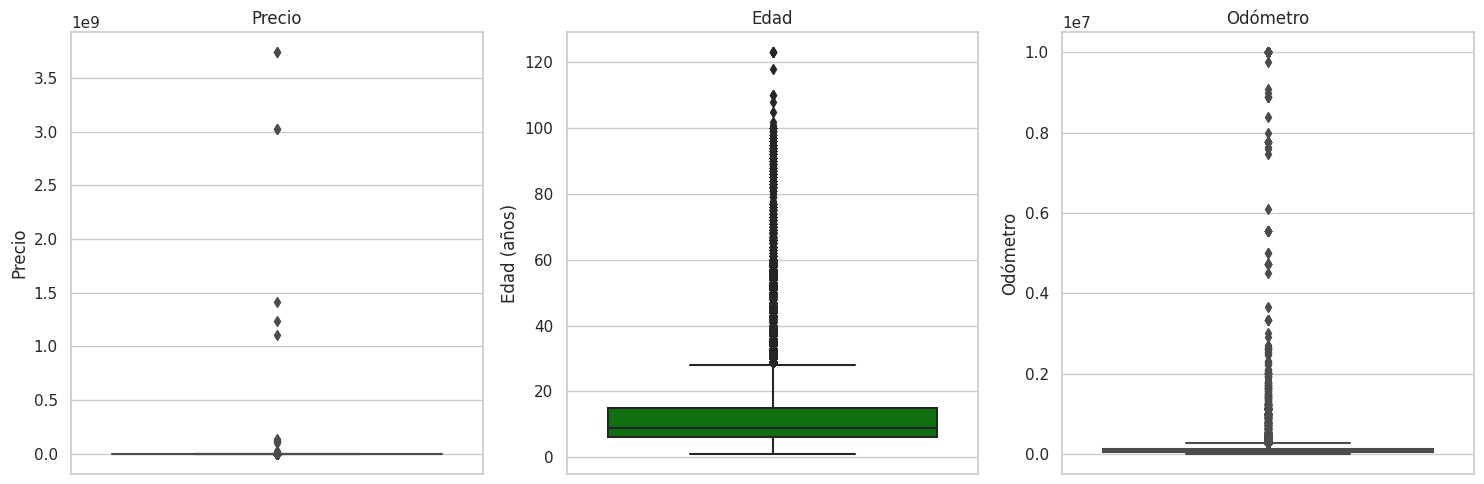

In [52]:
sns.set(style="whitegrid")

# Crear subplots para los boxplots de las columnas
plt.figure(figsize=(15, 5))

plt.subplot(131)  # Primer subplot para 'price'
sns.boxplot(data=cars_df, y='price', color='blue')
plt.title('Precio')
plt.ylabel('Precio')

plt.subplot(132)  # Segundo subplot para 'age'
sns.boxplot(data=cars_df, y='age', color='green')
plt.title('Edad')
plt.ylabel('Edad (años)')

plt.subplot(133)  # Tercer subplot para 'odometer'
sns.boxplot(data=cars_df, y='odometer', color='red')
plt.title('Odómetro')
plt.ylabel('Odómetro')

# Mostrar los boxplots
plt.tight_layout()
plt.show()

Si el conjunto de outliers es “relativamente grande” (aunque sabemos que deben andar alrededor de un 5% del conjunto total de datos), realizar una investigación particular sobre ellos que permita tomar mejores decisiones.

4b) Calcula, para cada variable, el porcentaje de sus valores atípicos y elimínalos del dataframe ¿Qué porcentaje de los registros iniciales se eliminaron?

In [53]:
def remove_outliers(df, column):
    q1 = df[column].quantile(0.25)  # Primer cuartil
    q3 = df[column].quantile(0.75)  # Tercer cuartil
    iqr = q3 - q1

    # Definir límites para valores atípicos
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Filtrar valores que no son atípicos
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    # Calcular el porcentaje de registros eliminados
    removed_percentage = (len(df) - len(filtered_df)) / len(df) * 100

    return filtered_df, removed_percentage

# Calcular el porcentaje de valores atípicos y eliminarlos para cada variable
total_removed_percentage = 0
columns_to_process = cars_df.columns

for column in columns_to_process:
    if cars_df[column].dtype in ['int64', 'float64']:
        cars_df, removed_percentage = remove_outliers(cars_df, column)
        total_removed_percentage += removed_percentage
        print(f"Porcentaje de valores atípicos eliminados en '{column}': {removed_percentage:.2f}%")

Porcentaje de valores atípicos eliminados en 'price': 1.64%
Porcentaje de valores atípicos eliminados en 'odometer': 0.82%
Porcentaje de valores atípicos eliminados en 'lat': 1.52%
Porcentaje de valores atípicos eliminados en 'long': 0.02%
Porcentaje de valores atípicos eliminados en 'age': 3.04%


4c) Dibuja nuevamente los histogramas para observar claramente el sesgo de las variables tras la eliminación de los outliers.

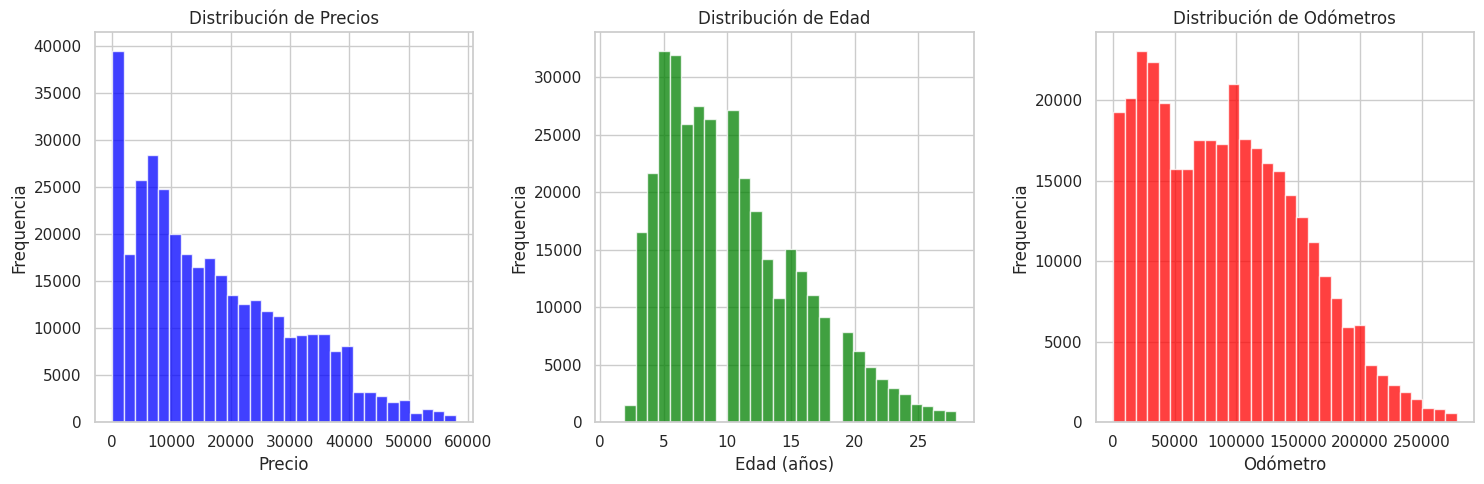

In [54]:
# Crear un subplot de 1x3 porque son 3 columnas
plt.figure(figsize=(15, 5))

plt.subplot(131)  # Primer subplot para 'price'
plt.hist(cars_df['price'], bins=30, color='blue', alpha=0.75)
plt.title('Distribución de Precios')
plt.xlabel('Precio')
plt.ylabel('Frequencia')

plt.subplot(132)  # Segundo subplot para 'year'
plt.hist(cars_df['age'], bins=30, color='green', alpha=0.75)
plt.title('Distribución de Edad')
plt.xlabel('Edad (años)')
plt.ylabel('Frequencia')

plt.subplot(133)  # Tercer subplot para 'odometer'
plt.hist(cars_df['odometer'], bins=30, color='red', alpha=0.75)
plt.title('Distribución de Odómetros')
plt.xlabel('Odómetro')
plt.ylabel('Frequencia')

# Mostrar los histogramas
plt.tight_layout()
plt.show()

# **Parte 2**. Ingeniería de características

## Transformando variables numéricas

La distribución de las variables determinará que método usar y en qué orden. Por ejemplo, en variables sesgadas se debe realizar primero la transformación  y luego el escalamiento, ya que el efecto deseado es "desinclinar" las distribuciones del eje y ese efecto se maximiza cuando aplica en el rango completo en comparación con aplicarlo en variables con una desviación estándar unitaria (por z-score) o variables en el rango [0,1] (por Min-Max).

Aplicar es escalamiento antes comprimiría la mayoría de los datos en un rango estrecho. Entonces se debe iniciar con transformar la característica en Gaussiana y luego escalarla.

5a) Genera gráficos Q-Q de las variables `price, age, odometer` para observar las diferencias entre sus distribuciones y la normal.


In [61]:
import math

def make_qqplot(df, columns):

    plt.figure(figsize=(10, 6), constrained_layout=True)

    for i in range(len(columns)):

        # location in figure
        ax = plt.subplot(math.ceil(len(columns) / 3), 3, i + 1)

        # variable to plot
        var = columns[i]

        # q-q plot
        stats.probplot((df[var]), plot=plt)

        # add variable name as title
        ax.set_title(var)

    plt.show()


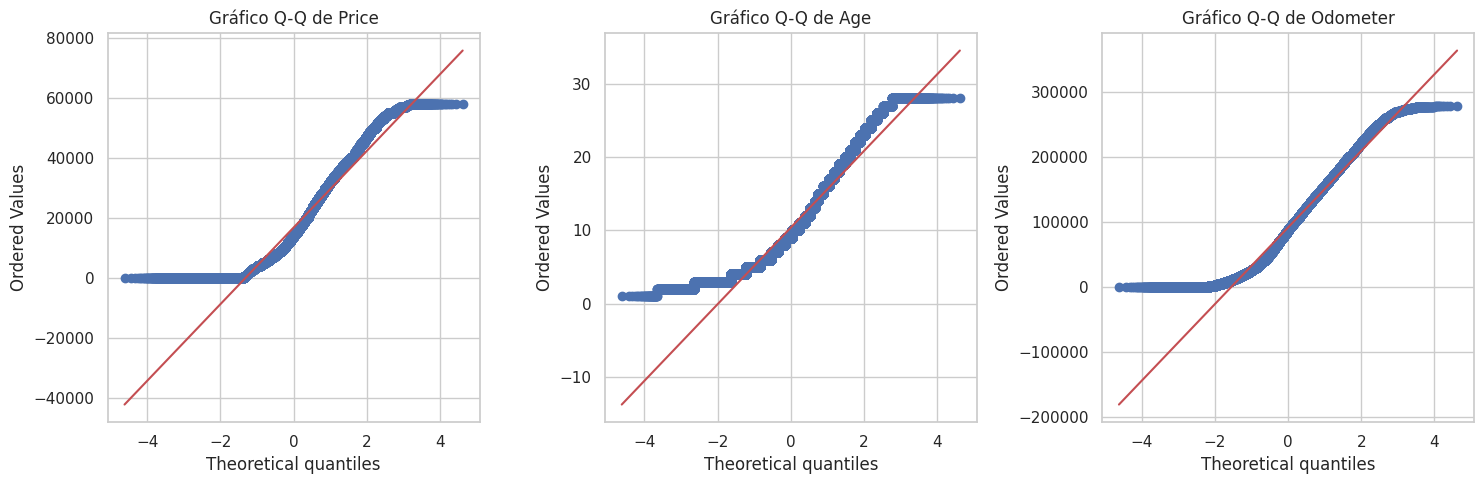

In [55]:
import scipy.stats as stats

# Crear subplots para los gráficos Q-Q
plt.figure(figsize=(15, 5))

# Gráfico Q-Q para 'price'
plt.subplot(131)
stats.probplot(cars_df['price'], plot=plt)
plt.title('Gráfico Q-Q de Price')

# Gráfico Q-Q para 'age'
plt.subplot(132)
stats.probplot(cars_df['age'], plot=plt)
plt.title('Gráfico Q-Q de Age')

# Gráfico Q-Q para 'odometer'
plt.subplot(133)
stats.probplot(cars_df['odometer'], plot=plt)
plt.title('Gráfico Q-Q de Odometer')

# Mostrar los gráficos Q-Q
plt.tight_layout()
plt.show()

Las transformaciones *Box-Cox* y *Yeo-Johnson* son generalizaciones, pues incluyen casos especiales de transformaciones: logarítmica (`λ = 0`), recíproca (`λ = -1`),  raíz cuadrada (`λ = 0.5`) y más exponentes. En *Box-Cox* se evalúan varios valores de `λ` y se selecciona aquel que arroja la mejor transformación

La transformación de *Yeo-Johnson* es una extensión de la transformación de *Box-Cox* que ya no está restringida a valores positivos. En otras palabras, la transformación de *Yeo-Johnson* se puede utilizar en variables con valores cero y negativos, así como valores positivos. Cuando la variable solo tiene valores positivos, la transformación de *Yeo-Johnson* es como la transformación de *Box-Cox* de la variable más uno.

En este caso, como las variables `price` y `odometer` tienen valores de 0, utilizaremos *Yeo-Johnson*.

5b) Aplica la transformación Yeo-Johnson para reducir el sesgo en estas variables. Házlo en una copia del dataframe a la que denominarás `transf_df`.

In [56]:

transformer = PowerTransformer(method="yeo-johnson", standardize=False)
transf = transformer.fit_transform(cars_df[['price', 'age', 'odometer']])
transf_df = pd.DataFrame(transf, columns=transformer.get_feature_names_out())


In [57]:
transf_df

,price,age,odometer
0,198.829386,2.561611,646.727774
1,167.457672,2.982940,722.305737
2,213.466568,1.477539,357.784016
3,192.021131,2.128848,538.492994
4,140.200800,2.679651,987.883327
...,...,...,...
357157,170.630049,1.733276,472.639487
357158,190.945041,1.477539,278.757521
357159,202.370721,1.477539,157.769165
357160,186.558080,1.946117,455.785435


5c) Dibuja nuevamente los gráficos Q-Q y los histogramas para observar el efecto de la transformación.

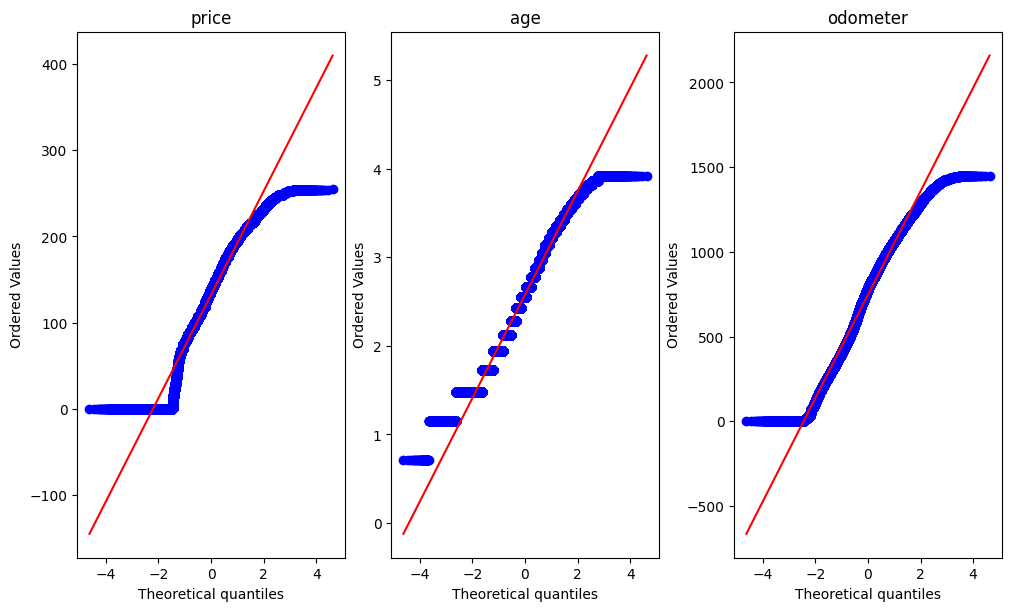

In [ ]:
make_qqplot(transf_df, ['price', 'age', 'odometer'])

<Axes: xlabel='odometer', ylabel='Count'>

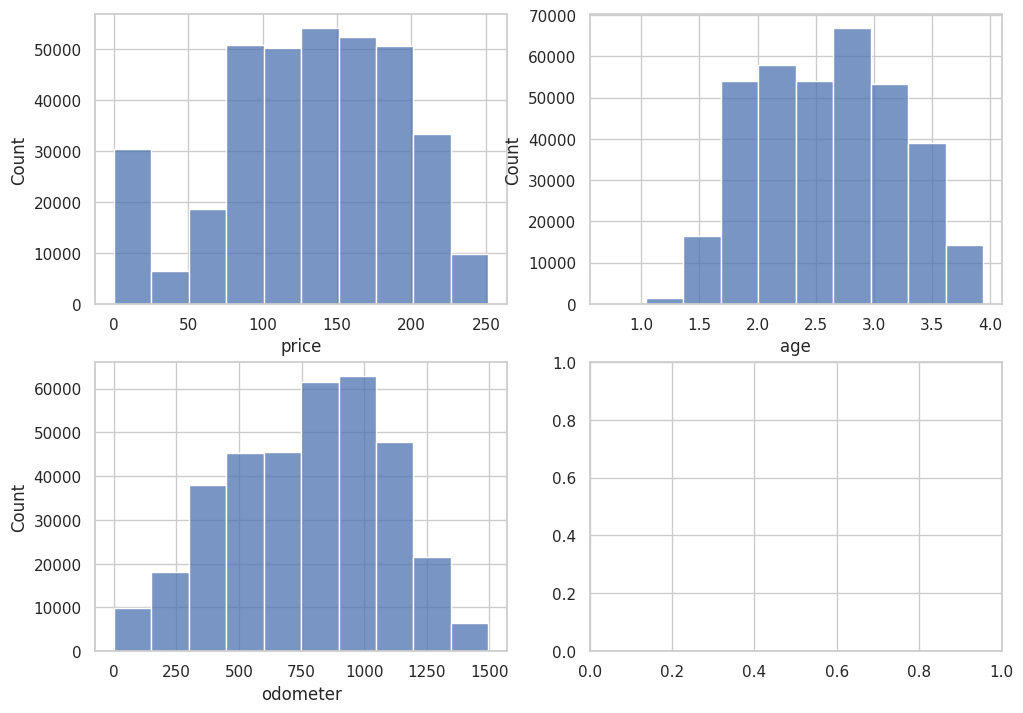

In [65]:
transf_df.head()
fig, axes = plt.subplots(2, 2, figsize=(11.7, 8.27))
sns.histplot(transf_df, x='price', ax=axes[0, 0], bins=10)
sns.histplot(transf_df, x='age', ax=axes[0, 1], bins=10)
sns.histplot(transf_df, x='odometer', ax=axes[1, 0], bins=10)

## Escalando variables numéricas

6a) Como las tres variables poseen diferentes escalas, aplica el método Min-Max (al dataframe obtenido: `transf_df`) para que queden en el rango fijo [0 a 1]. Házlo en una copia del dataframe a la que denominarás `minmax_df`.


In [63]:
from sklearn import preprocessing

minmax_df = transf_df.copy()

minmax_scale = preprocessing.MinMaxScaler().fit_transform(minmax_df.to_numpy())
minmax_df = pd.DataFrame(minmax_scale, columns=['price', 'age', 'odometer'])


In [66]:
scalar = MinMaxScaler()
minmax = scalar.fit_transform(transf_df)
minmax_df = pd.DataFrame(minmax, columns=scalar.get_feature_names_out())
minmax_df

,price,age,odometer
0,0.789878,0.572486,0.432278
1,0.665250,0.703140,0.482795
2,0.848027,0.236316,0.239146
3,0.762831,0.438287,0.359933
4,0.556968,0.609091,0.660310
...,...,...,...
357157,0.677852,0.315620,0.315916
357158,0.758557,0.236316,0.186324
357159,0.803947,0.236316,0.105454
357160,0.741129,0.381622,0.304651


6b) Dibuja nuevamente los histogramas para verificar que el escalamiento no cambia la distribución.

<Axes: xlabel='odometer', ylabel='Count'>

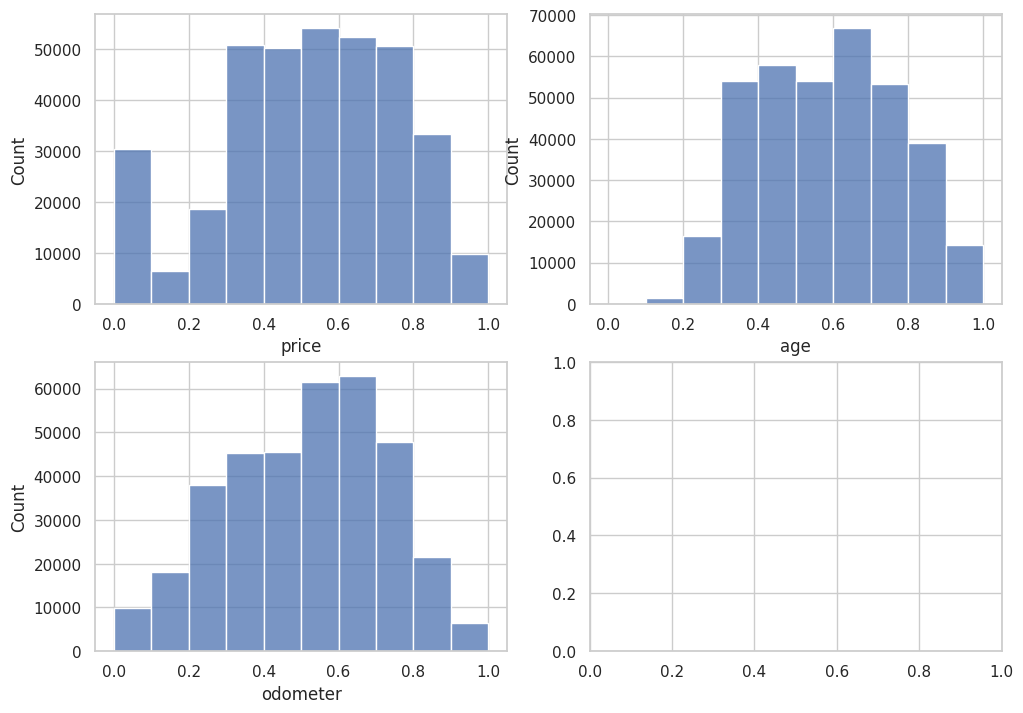

In [67]:
minmax_df.head()
fig, axes = plt.subplots(2, 2, figsize=(11.7, 8.27))
sns.histplot(minmax_df, x='price', ax=axes[0, 0], bins=10)
sns.histplot(minmax_df, x='age', ax=axes[0, 1], bins=10)
sns.histplot(minmax_df, x='odometer', ax=axes[1, 0], bins=10)

## Codificando variables categóricas


7a) Utiliza el método `describe()` para obtener el resumen de las estadísticas descriptivas en las variables categóricas.

In [68]:
cars_df.describe(include=['object'])

,region,region_url,manufacturer,model,fuel,title_status,transmission,type,state
count,357162,357162,357162,357162,357162,357162,357162,357162,357162
unique,404,413,40,18975,5,6,3,13,51
top,columbus,https://grandrapids.craigslist.org,ford,f-150,gas,clean,automatic,sedan,ca
freq,3015,2743,60422,7052,304140,345690,283273,151361,42311


7b) Según la cardinalidad observada, separa en dos listas (`highly_cardinal_variables` y `few_cardinal_variables`) los nombres de las variables con alta cardinalidad y baja cardinalidad respectivamente.

In [69]:
# El umbral para determinar alta cardinalidad se establece en 100 como se indicó en la clase
cardinality_threshold = 100
highly_cardinal_variables = []
few_cardinal_variables = []
categorical_df = cars_df.select_dtypes(include=['object'])

for column in categorical_df.columns:
    unique_count = categorical_df[column].nunique()

    if unique_count > cardinality_threshold:
        highly_cardinal_variables.append(column)
    else:
        few_cardinal_variables.append(column)

# Imprime las listas resultantes
print("Variables con alta cardinalidad:", highly_cardinal_variables)
print("Variables con baja cardinalidad:", few_cardinal_variables)

Variables con alta cardinalidad: ['region', 'region_url', 'model']
Variables con baja cardinalidad: ['manufacturer', 'fuel', 'title_status', 'transmission', 'type', 'state']


7c) Visualiza en gráficos de barras la frecuencias de las categorías para las variables con baja cardinalidad (en `few_cardinal_variables`)

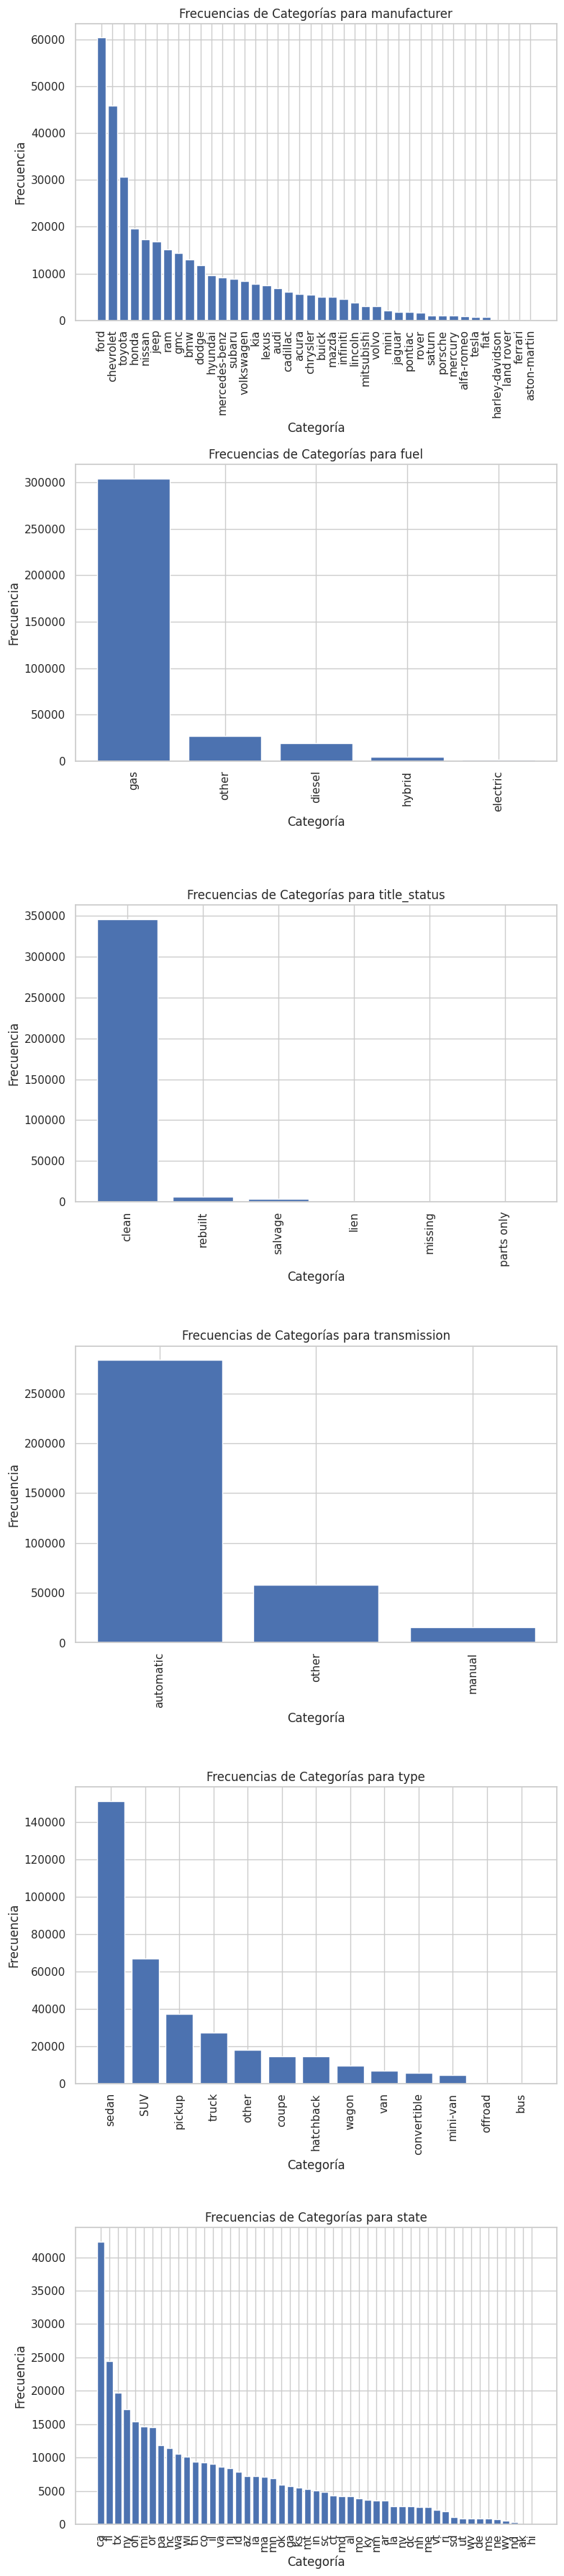

In [71]:
# Subplots para las variables con baja cardinalidad
fig, axes = plt.subplots(len(few_cardinal_variables), 1, figsize=(8, 6 * len(few_cardinal_variables)))

for i, column in enumerate(few_cardinal_variables):
    # Frequencias de categorías
    category_counts = cars_df[column].value_counts()

    # Plot
    axes[i].bar(category_counts.index, category_counts.values)
    axes[i].set_title(f'Frecuencias de Categorías para {column}')
    axes[i].set_xlabel('Categoría')
    axes[i].set_ylabel('Frecuencia')
    axes[i].tick_params(axis='x', labelrotation=90)

# Ajusta el espaciado entre subgráficos
plt.tight_layout()

# Muestra los gráficos
plt.show()

8. Aplica codificación *one-hot* a las variables en `few_cardinal_variables`.


In [72]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
fitTransEnc = encoder.fit_transform(cars_df[few_cardinal_variables])
dfOneHotEncoded = pd.DataFrame(fitTransEnc.tolist())

dfOneHotEncoded.columns = encoder.get_feature_names_out(few_cardinal_variables)
dfOneHotEncoded

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,manufacturer_chrysler,manufacturer_dodge,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
357158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
357159,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
357160,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


9. Aplica codificación binaria a las variables en `highly_cardinal_variables`.

In [76]:
from category_encoders.binary import BinaryEncoder

dfBinaryEncoded = cars_df[highly_cardinal_variables]
binaryEncoder = encoder = BinaryEncoder(cols=highly_cardinal_variables)
binaryEncoder.fit(dfBinaryEncoded)
dfBinaryEncoded = binaryEncoder.transform(dfBinaryEncoded)

#dfBinaryEncoded.columns = encoder.get_feature_names_out(highly_cardinal_variables)
dfBinaryEncoded.columns = binaryEncoder.get_feature_names_out(highly_cardinal_variables)
dfBinaryEncoded

,region_0,region_1,region_2,region_3,region_4,region_5,region_6,region_7,region_8,region_url_0,...,model_5,model_6,model_7,model_8,model_9,model_10,model_11,model_12,model_13,model_14
27,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
28,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
29,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,1
30,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
31,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,1,1,0,0,1,0,1,0,0,1,...,1,1,0,0,1,0,0,1,1,1
426876,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,1,1,0,1,1,1
426877,1,1,0,0,1,0,1,0,0,1,...,0,0,0,0,0,1,1,0,1,1
426878,1,1,0,0,1,0,1,0,0,1,...,1,1,1,0,1,1,1,1,0,0


10. Concatena los dataframes obtenidos de las codificaciones anteriores al dataframe `minmax_df` (cuyas variables numéricas ya están transformadas) y elimina las columnas categóricas originales. Toma en cuenta que si los índices de los dataframes no coinciden, la concatenación no se realizará correctamente. Utiliza `reset_index(drop=True, inplace=True)` para restablecer los índices.

In [77]:
minmax_df.reset_index(drop=True, inplace=True)
dfOneHotEncoded.reset_index(drop=True, inplace=True)
dfBinaryEncoded.reset_index(drop=True, inplace=True)
minmax_df.join([dfBinaryEncoded, dfOneHotEncoded])

,price,age,odometer,region_0,region_1,region_2,region_3,region_4,region_5,region_6,...,state_sd,state_tn,state_tx,state_ut,state_va,state_vt,state_wa,state_wi,state_wv,state_wy
0,0.789878,0.572486,0.432278,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.665250,0.703140,0.482795,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.848027,0.236316,0.239146,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.762831,0.438287,0.359933,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.556968,0.609091,0.660310,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
357157,0.677852,0.315620,0.315916,1,1,0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
357158,0.758557,0.236316,0.186324,1,1,0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
357159,0.803947,0.236316,0.105454,1,1,0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
357160,0.741129,0.381622,0.304651,1,1,0,0,1,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
